# Introduction

For this project, we are going to make an analysis of the international sales of the current company by using python programming language in order to initiate the commercial strategies for the company based on the performance.

First of all, we will clean the missing value.This can help us read data clearly in terms of country, product line or sales.

Then we would like to check the overall sales performance of the comapany.

We will also analyse countries' sales performance from 2003 to 2005 in order to know our main market and weak market. 

As for products analysis, we are going to compare sales of all products from 2003 to 2005, which will give us an idea about which product we should invest or distribute more, and then analyzing the best sellers in each month in order to distribute more products.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [36]:
data=pd.read_csv('sales_data.csv')

# Preliminary procedure: data cleaning

In [37]:
data.shape

(2823, 25)

In [38]:
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [39]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [41]:
len(data)

2823

In [42]:
data.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [43]:
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [44]:
#dropping column addressline,state,territory due to large lissing values
remove = ['ADDRESSLINE2','STATE','TERRITORY']
data.drop(remove, inplace =True, axis =1)

In [45]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [46]:
quant_vars = ['QUANTITYORDERED','PRICEEACH','SALES','MSRP']
data[quant_vars].describe()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


In [47]:
data['COUNTRY'].nunique()#19 countries

19

In [48]:
data['YEAR_ID'].nunique()#3 years data 

3

In [51]:
data['PRODUCTLINE'].nunique() #7 categories

7

In [52]:
data.groupby(['YEAR_ID'])['MONTH_ID'].nunique()
#we dont have tha data for all the 12 months for the year 2005

YEAR_ID
2003    12
2004    12
2005     5
Name: MONTH_ID, dtype: int64

# Data visualisation & analysis

<AxesSubplot:>

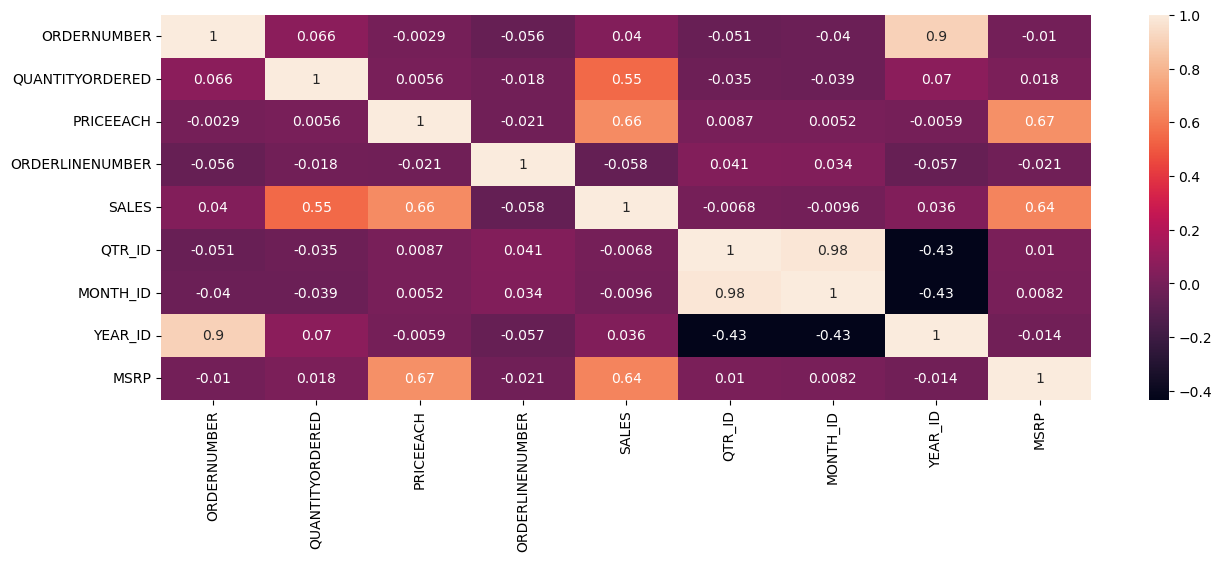

In [53]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True)
#correlation matirx

## Overall sales performance

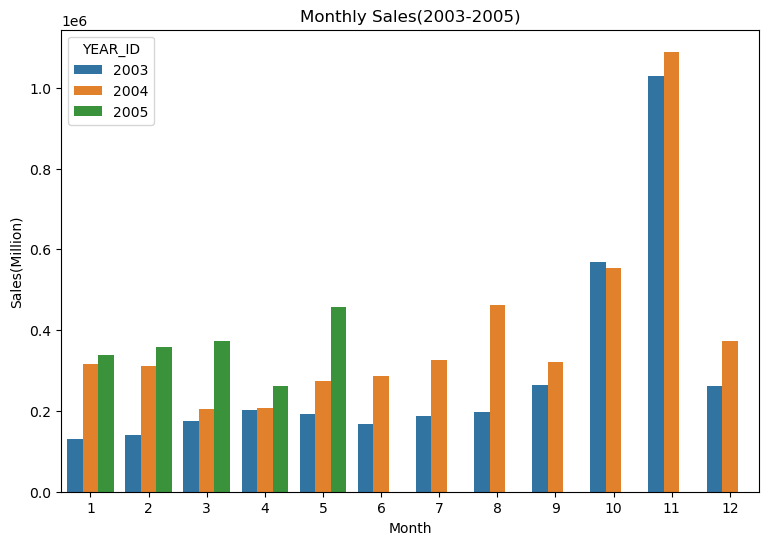

In [54]:
plt.figure(figsize=(9,6))

monthly_revenue = data.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()
monthly_revenue
sns.barplot(x="MONTH_ID", y="SALES",hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales(Million)')
plt.title('Monthly Sales(2003-2005)')
plt.show()

### In general, the company sales the most in Nov and Oct but the least in Jan and Feb.
### However, we observe growth each year in almost every month. We have reason to believe that the company is developing towards an optimistic way.

Text(0.5, 1.0, 'Sales per year')

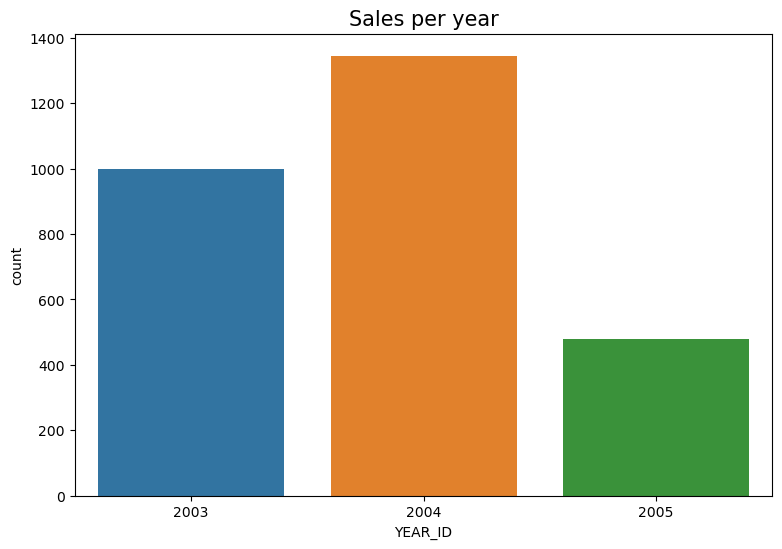

In [55]:
plt.figure(figsize = (9,6))
sns.countplot(x="YEAR_ID",data=data)
plt.title("Sales per year", fontsize = 15)

### From the above two plots we can infer that the sales was growing from 2003-2004, but since we only have 5-month sales data for 2005, we cannot have a overview of the year of 2005.

In [56]:
monthly_revenue['MONTHLY GROWTH'] = monthly_revenue['SALES'].pct_change()

plt.figure(figsize=(9,6))
sns.distplot(data['SALES'])
plt.title('SALES Distribution')
plt.xlabel('SALES')
plt.ylabel('Frequency')
plt.show()


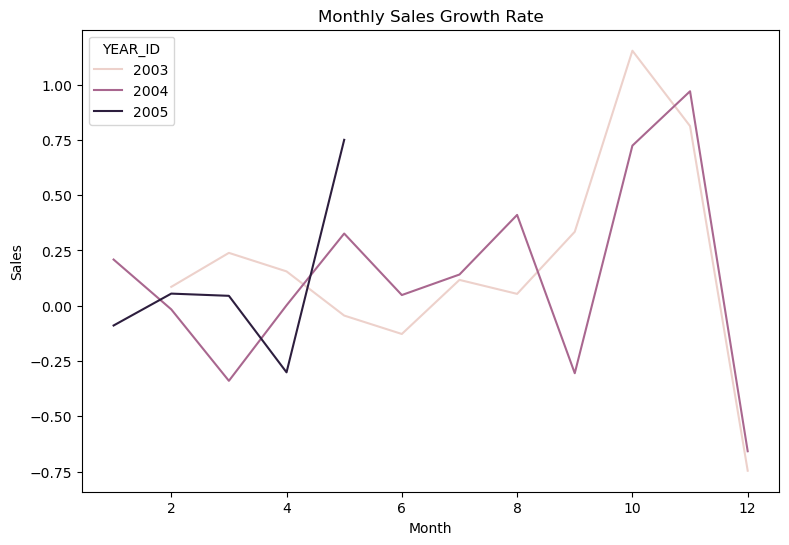

In [57]:
plt.figure(figsize=(9,6))
sns.lineplot(x="MONTH_ID", y="MONTHLY GROWTH",hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Growth Rate')
plt.show()

### The sales revenue boomed before winter(Oct and Nov)

## Country performance

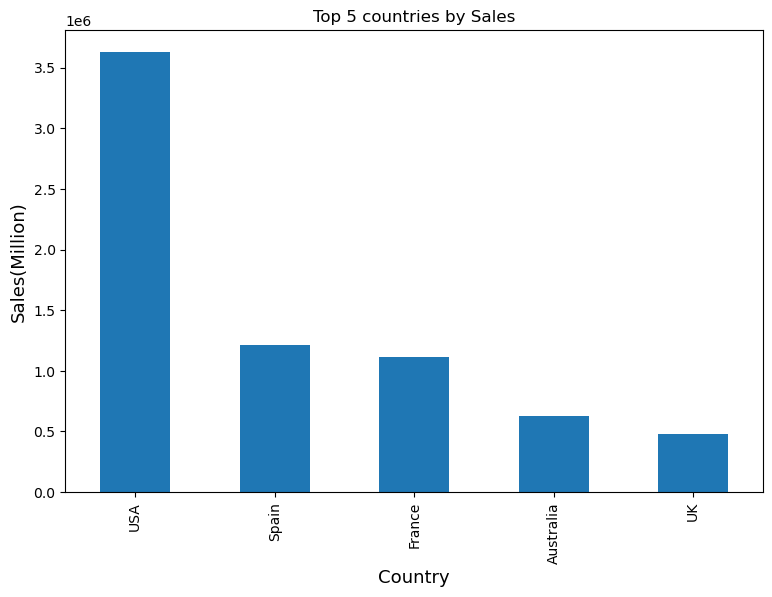

In [24]:
plt.figure(figsize=(9,6))
top = data.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)
top1=top.head(5)
top1.plot(kind = 'bar')
plt.title('Top 5 countries by Sales')
plt.xlabel('Country', size=13)
plt.ylabel('Sales(Million)', size=13)

plt.show()

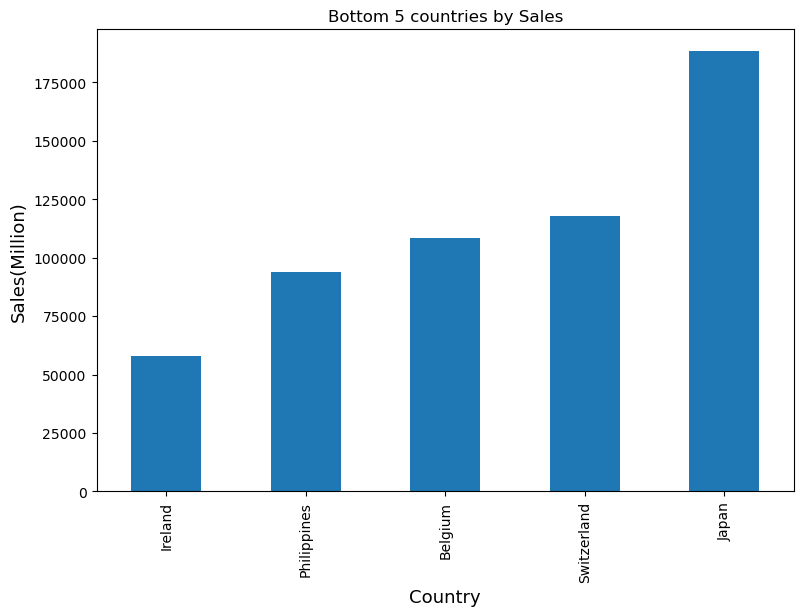

In [25]:
plt.figure(figsize=(9,6))
top = data.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=True)
top2=top.head(5)
top2.plot(kind = 'bar')
top2.plot(kind = 'bar')
plt.title('Bottom 5 countries by Sales')
plt.xlabel('Country', fontsize= 13)
plt.ylabel('Sales(Million)', fontsize=13)

plt.show()

### From 2003 to 2005, our biggest market is in USA,followed by Spain and France; But the performance in Ireland, Philiphines and belgium is not satisfactory.

## Category performance

In [28]:
top_product_revenues = data.groupby(['PRODUCTLINE']).sum().sort_values('SALES', ascending = False)
top_product_revenues = top_product_revenues[['SALES']]
top_product_revenues.head()

,SALES
PRODUCTLINE,
Classic Cars,3919615.66
Vintage Cars,1903150.84
Motorcycles,1166388.34
Trucks and Buses,1127789.84
Planes,975003.57


Text(0, 0.5, 'Sales(Million)')

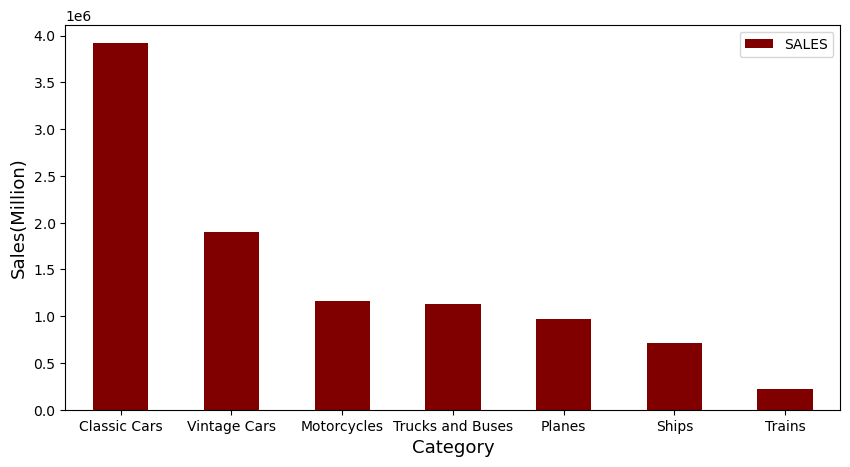

In [29]:
ax = top_product_revenues.plot.bar(figsize=(10,5),color= "maroon",rot=0)
ax.set_xlabel("Category", fontsize = 13)
ax.set_ylabel("Sales(Million)", fontsize = 13)

### In general, from 2003 to 2005, Classic Car is our best-seller, far beyond the second category Vintage Car; 
### Train and Ship have the least sales revenue

In [31]:
import ipywidgets as widgets
from IPython.display import display, clear_output

Text(0.5, 1.0, 'Monthly Sales by Category')

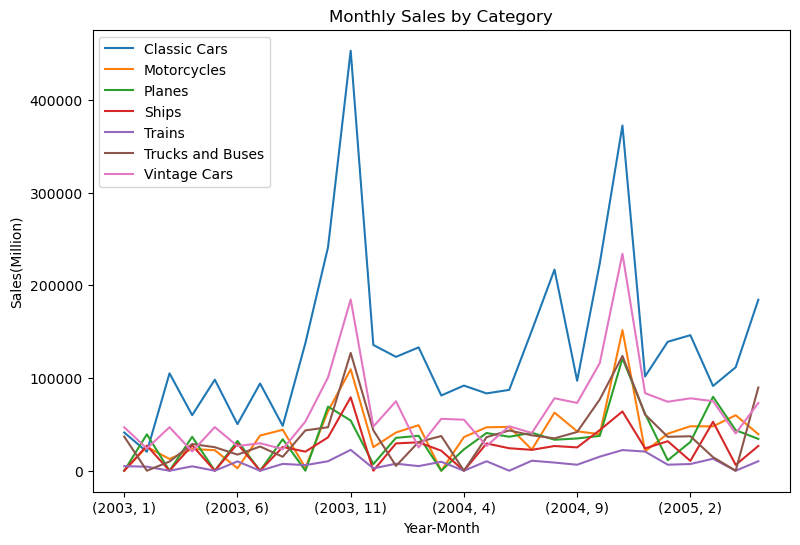

In [32]:
cat = data.groupby(['YEAR_ID','MONTH_ID','PRODUCTLINE']).SALES.sum()
cate = cat.unstack(level = 2).fillna(0)
ax = cate.plot.line(figsize = (9,6))
plt.legend(['Classic Cars','Motorcycles','Planes','Ships','Trains','Trucks and Buses','Vintage Cars'])
plt.xlabel('Year-Month')
plt.ylabel('Sales(Million)')
plt.title('Monthly Sales by Category')

### In November, all the category reached the highest sales level among the whole year;
### Classic Car is almost the best performance in each month from 2003 to 2005;

# Conclusion & Recommendation

In [ ]:
## Conslusion:
## 1.  observed growth from 2003 to 2004, and monthly YoY% growth in almost each month. We can infer that the company has a promising future.
## 2.  The peak sales month are November and October, but the low sales month are January and February. The sales revenue boomed before winter(Oct and Nov)
## 3.  Overall, our biggest market is the USA, followed by Spain and France; But the performance in Ireland, Philiphines and belgium is not satisfactory.
## 4.  In category level, our best-seller is Classic cars, far beyond the second best category Vintage Car; While Train and Ship have the least sales revenue
## 5.  Classic Car has almost the best performance in each month from 2003 to 2005;

## Recommendation:
## 1.  In general, we can invest more in the operation(supply chain, strorage, warehouse...) of the company since it's developing towards the optimistic way to increase the profit.
## 2.  Before October and November, we should ensure we have enough products storage to be ready for the incoming peak sales month. For January and February, we need to think about some strategies to stimulate the sales. For example, price or marketing promotion.
## 3.  According to the country sales performance, we can learn from the marketing strategy in the USA and see if we can apply to other market; At the same time, we can invest more in USA to push more sales in this market;
## 4.  Classic Car is our absolute best-seller in each month, so we can consider to invest more R&D in this category; In case the market is saturated, we should also makes innovation and extend the services in this category and also other categories. 
